In [1]:
# load dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time

In [2]:
# read in data
raw_data = pd.read_csv("data.csv")
# remove NaN column
raw_data = raw_data.iloc[:,:-1]
# change 'diagnosis' column values to 1 or 0
raw_data['diagnosis'] = raw_data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')
# change 'id' column to index
raw_data = raw_data.set_index('id')

# assign X, y data set and split to training and testing data sets
y = raw_data['diagnosis']
X = raw_data.drop('diagnosis', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [3]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm_model.score(X_train_scaled, y_train)))
print('The accuracy on the testing subset: {:.3f}'.format(svm_model.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.987
The accuracy on the testing subset: 0.977


Feature ranking:
1. feature 27 (0.210779)
2. feature 7 (0.149943)
3. feature 20 (0.108498)
4. feature 3 (0.105297)
5. feature 22 (0.081140)
6. feature 26 (0.060775)
7. feature 10 (0.049551)
8. feature 5 (0.041690)
9. feature 21 (0.023794)
10. feature 6 (0.017544)
11. feature 23 (0.016565)
12. feature 29 (0.016544)
13. feature 28 (0.014551)
14. feature 0 (0.011910)
15. feature 13 (0.010352)
16. feature 2 (0.010050)
17. feature 1 (0.009186)
18. feature 14 (0.008554)
19. feature 12 (0.008205)
20. feature 9 (0.006960)
21. feature 18 (0.006404)
22. feature 19 (0.006344)
23. feature 24 (0.006276)
24. feature 4 (0.005310)
25. feature 15 (0.004132)
26. feature 11 (0.002343)
27. feature 25 (0.002254)
28. feature 8 (0.002066)
29. feature 16 (0.001673)
30. feature 17 (0.001308)


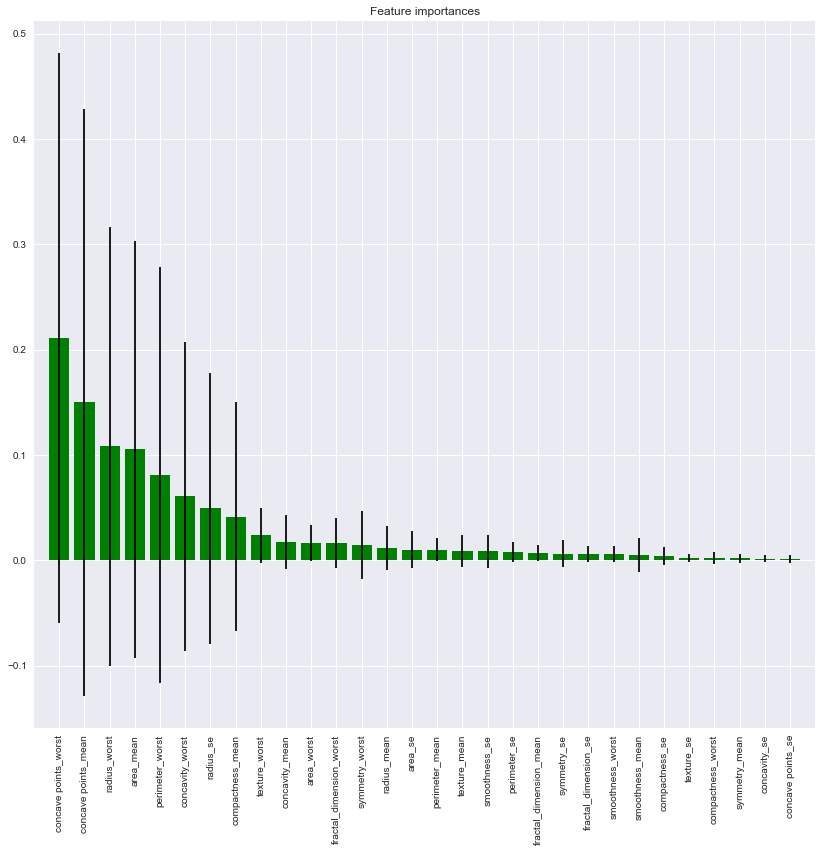

In [5]:
clf_rf_1 = RandomForestClassifier()      
clr_rf_1 = clf_rf_1.fit(X_train_scaled,y_train)
importances = clr_rf_1.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_scaled.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.show()

Feature ranking:
1. feature 27 (0.237763)
2. feature 6 (0.137721)
3. feature 7 (0.136594)
4. feature 22 (0.103012)
5. feature 2 (0.090924)
6. feature 0 (0.060186)
7. feature 23 (0.031413)
8. feature 1 (0.023728)
9. feature 20 (0.021151)
10. feature 24 (0.020790)
11. feature 14 (0.012830)
12. feature 21 (0.011781)
13. feature 4 (0.010872)
14. feature 3 (0.010640)
15. feature 25 (0.010035)
16. feature 28 (0.009462)
17. feature 26 (0.009306)
18. feature 9 (0.009261)
19. feature 5 (0.008956)
20. feature 16 (0.007173)
21. feature 10 (0.007022)
22. feature 8 (0.007015)
23. feature 13 (0.006244)
24. feature 15 (0.003886)
25. feature 19 (0.003739)
26. feature 12 (0.003199)
27. feature 17 (0.002527)
28. feature 11 (0.001117)
29. feature 18 (0.000944)
30. feature 29 (0.000706)


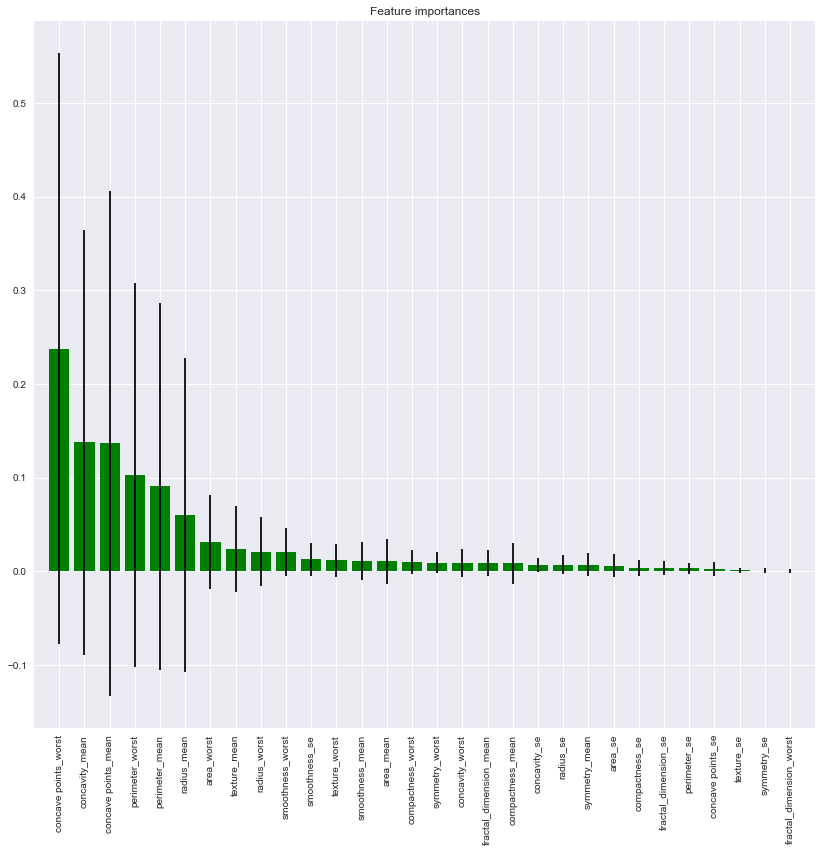

In [6]:
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(X_train,y_train)
importances = clr_rf_2.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_2.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

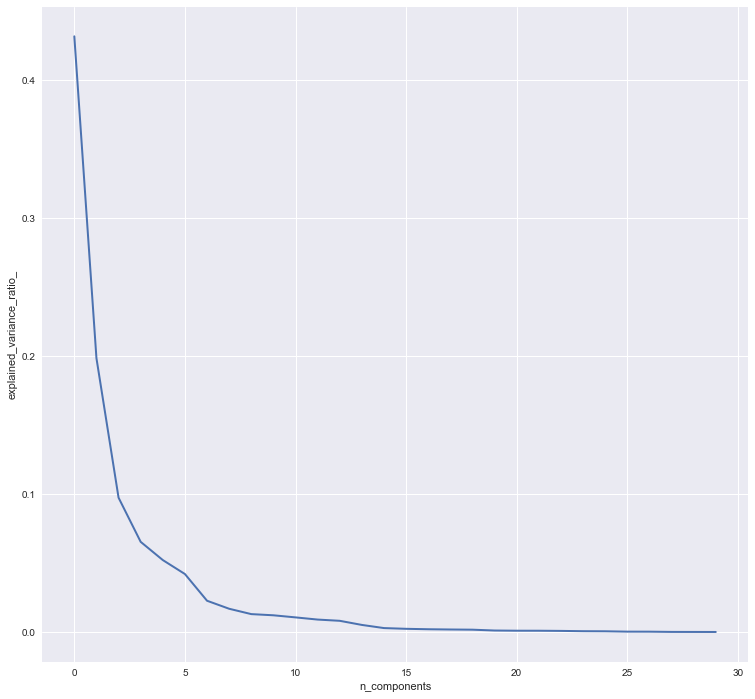

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_scaled)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
plt.show()

In [ ]:
X_train_scaled.shape

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_train_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
# finalDf = pd.concat([principalDf, y_train['diagnosis']], axis = 1)

In [8]:
principalDf.shape

(398, 2)

In [9]:
diag = pd.DataFrame(y_train)
diag.reset_index(inplace=True, drop=True)

In [11]:
finalDf = pd.concat([principalDf, diag['diagnosis']], axis = 1)

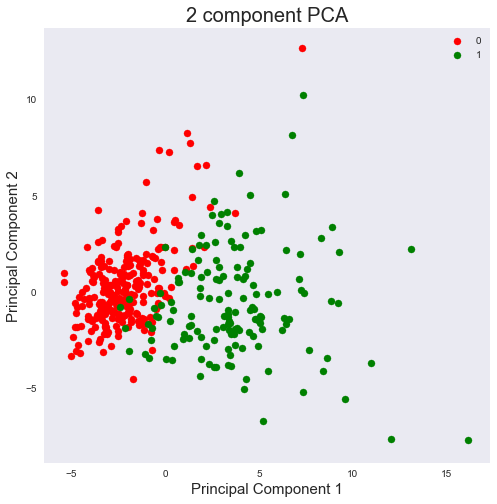

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0', '1']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()